In [156]:
# Following Coursera Exercises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d


%matplotlib inline  

import seaborn as sns

In [157]:
# 1
def warmUpExercise():
    return(np.identity(5))

In [158]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [159]:
# Lets do Linear Regression with One Independent(X) and one Dependant Variable(target: y)

# Load Data

data = pd.read_csv('ex1data1.txt',header=None)
data.columns = ['Population','profit']
data

,Population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [160]:
data.describe()

,Population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [161]:
# preprocessing steps

x= data.iloc[:,0] # np.ones(data.shape[0])

# first way
X = np.array([np.ones(data.shape[0]),x])
X = X.T
print("X from array ",X.shape)
y = np.array([data.iloc[:,1]])
y = y.T
print("y from array ",y.shape)
# line = a + b x1
# in matrix ones col is added for matrix operations


# second way
#X = np.c_[np.ones(data.shape[0]),x]
#y = np.c_[data.iloc[:,1]]

#print("",X.shape)
#print("",y.shape)


X from array  (97, 2)
y from array  (97, 1)


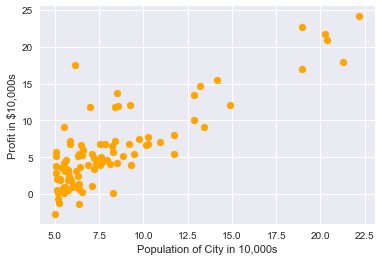

In [162]:
# Ploting
plt.scatter(X[:,1],y,c='orange')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

<img src="Screenshot_1.png" />

In [163]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [164]:
computeCost(X,y)

32.072733877455676

In [165]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144] [ 1.16636235]
(1500,)
min cost: 4.48338825659


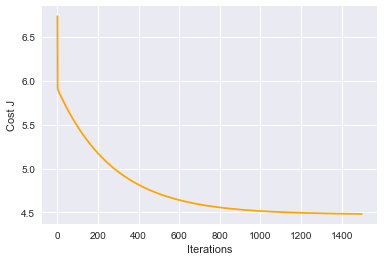

In [166]:
# theta for minimized cost J
# As we know iterations minimize our theta values so Play iterations Values and observe the cost value
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta[0],theta[1])
print(Cost_J.shape)
print('min cost:',Cost_J [Cost_J.shape[0]-1])

plt.plot(Cost_J,c='orange')
plt.ylabel('Cost J')
plt.xlabel('Iterations');

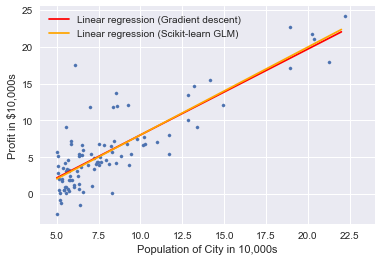

In [167]:
xx = np.arange(5,23) # Check range and set values
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=10)
plt.plot(xx,yy, c='r', label='Linear regression (Gradient descent)')


# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())         # regr.fit(X[:,1].reshape(X.shape[0],1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx,c='orange', label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=2);

# Prediction

In [168]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


# Linear Regression with Multiple Variables

In [180]:
# Lets do Linear Regression with two Independent(X) and one Dependant Variable(target: y)

# Load Data

data = pd.read_csv('ex1data2.txt',header=None)
data.columns = ['Population','NoOfBeds','profit']
data.head(5)

,Population,NoOfBeds,profit
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [181]:
X = data.iloc[:,:-1]
X = np.c_[np.ones(data.shape[0]),X]
y = np.c_[data.iloc[:,1]]



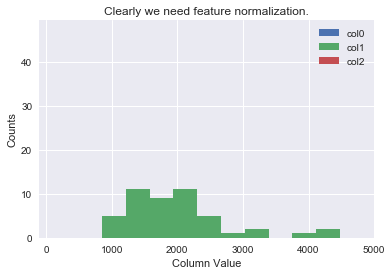

In [182]:
# Visualization

#Quick visualize data

plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col0')
dummy = plt.hist(X[:,1],label = 'col1')
dummy = plt.hist(X[:,2],label = 'col2')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

Above graph shows that variables values are not in good range. 


## Feature normalizing the columns (subtract mean, divide by standard deviation or Range)
As Andrew Ng mentioned


# Feature Scaling
So that all cols features input are in specific ranges

In [183]:
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()

print(Xnorm.shape)
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))         # simple mean
    stored_feature_stds.append(np.std(Xnorm[:,icol]))           # STD
    
    #Skip the first column
    if icol == 0: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]
    print('col used: ',icol)

(47, 3)
col used:  1
col used:  2


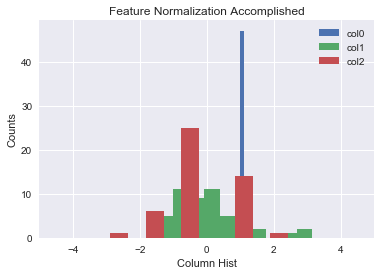

In [184]:

#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col0')
dummy = plt.hist(Xnorm[:,1],label = 'col1')
dummy = plt.hist(Xnorm[:,2],label = 'col2')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Hist')
plt.ylabel('Counts')
dummy = plt.legend()

Lets boom

# Lets find the Parameters from gradient descent


(47, 3)
(47, 1)
theta:  [ 3.11330569] [ 0.06380303] [ 0.68764211]
(400,)
min cost: 0.00345072154635


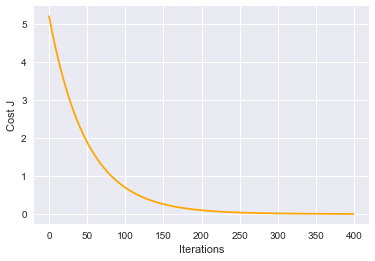

In [208]:
#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
print(Xnorm.shape)
print(y.shape)
initial_theta = np.zeros((Xnorm.shape[1],1))
theta , Cost_J = gradientDescent(Xnorm,y,initial_theta,0.01,400)


#Plot convergence of cost function:
print('theta: ',theta[0],theta[1],theta[2])
print(Cost_J.shape)
print('min cost:',Cost_J [Cost_J.shape[0]-1])

plt.plot(Cost_J,c='orange')
plt.ylabel('Cost J')
plt.xlabel('Iterations');



# "Check of result: What is price of house with 1650 square feet and 3 bedrooms?"

In [212]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)


Xtest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
Xtestscaled = [(Xtest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(Xtest))]

Xtestscaled.insert(0,1)
print(Xtestscaled)
print('theta:',theta)
print ("$%0.2f" % float(h(theta,Xtestscaled)*10000))




[1, -0.44604386032761639, -0.2260933675776883]
theta: [[ 3.11330569]
 [ 0.06380303]
 [ 0.68764211]]
$29293.75


In [214]:
# 2

from numpy.linalg import inv
# Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y): # return theta, one way is using gradient descent
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)



print( "Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print(X.shape)
print(y.shape)
print('theta:',normEqtn(X,y))
print( "$%0.2f" % float( h(normEqtn(X,y),[1,1650.,3])*10000 ) )      # h = theta.T * X

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
(47, 3)
(47, 1)
theta: [[ -2.06501483e-14]
 [ -1.02999206e-18]
 [  1.00000000e+00]]
$30000.00
